# Customer Churn Analysis and Prediction

## Exploratory Data Analysis

In this project, I will explore customer data through exploratory data analysis (EDA) and develop a predictive model to identify churn. Customer churn occurs when clients decide to discontinue their relationship with a company. Understanding the drivers behind this behavior is highly valuable, since keeping loyal customers is generally cheaper and more profitable than constantly trying to attract new ones.

Columns:
##### Demographic Information:
- 'customerID' = unique identifier for each customer
- 'gender' = customer's gender (Male/Female)
- 'SeniorCitizen' = whether the customer is a senior (1=yes; 0=no)
- 'Partner' = whether the customer has a partner (Yes/No)
- 'Dependents' = whether the customer has dependents (Yes/No)

##### Subscribed Services:
- 'tenure' = number of months the customer has stayed with the company
- 'PhoneService' = whether the customer has phone service (Yes/No)
- 'MultipleLines' = whether the customer has multiple lines (No/Yes/No Phone Service)
- 'InternetService' = type of Internet service (DSL/Fiber optic/No)
- 'OnlineSecurity' = whether the customer has online security (Yes/No/No INternet service)
- 'OnlineBackup' = whether the customer has online backup (Yes/No/No Internet service)
- 'DeviceProtection' = whether the customer has device protection (Yes/No/No Internet service)
- 'TechSupport' = whether the customer has tech support (Yes/No/No Internet service)
- 'StreamingTV' = whether the customer has streming Tv (Yes/No/No Internet service)
- 'StreamingMovies' = whether the customer has streaming movies (Yes/No/No Internet service)

##### Contract Information
- 'Contract' = type of contract (Month-to-month, One year, Two Years)
- 'PaperlessBilling' = whether the customer uses paperless billing (Yes/No)
- 'PaymentMethod' = customer's payment method (Electronic check/Mailed Vheck/Bank Transfer/Credit card)

##### Financial Information
- 'MonthlyCharges' = customer's monthly spending
- 'TotalCharges' = total amount spent by the customer during their tenure

##### Target Variable
- 'Churn' = indicates if the customer has left the company (Yes/No)

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
#import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [4]:
#machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, chi2


In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score
#Add necessary imports for ColumnTransformer and Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

### Loading Data

In [126]:
df = pd.read_csv("C:/Users/gauricchio/OneDrive - Deloitte (O365D)/Desktop/LAVORO/Curriculum/Curriculum/GITHUB PORTFOLIO/Customer Churn Prediction/dataset/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Distribution: Churn
No     5174
Yes    1869
Name: count, dtype: int64


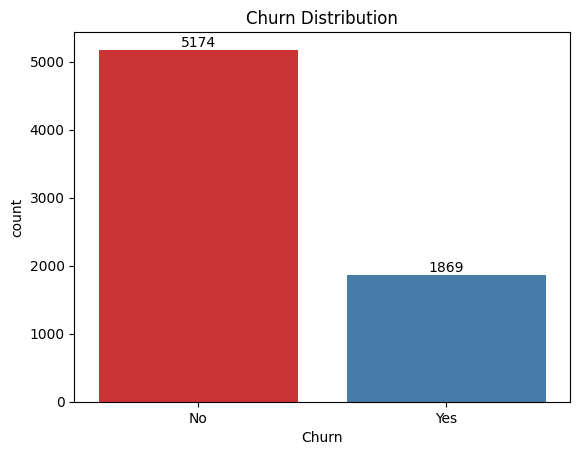

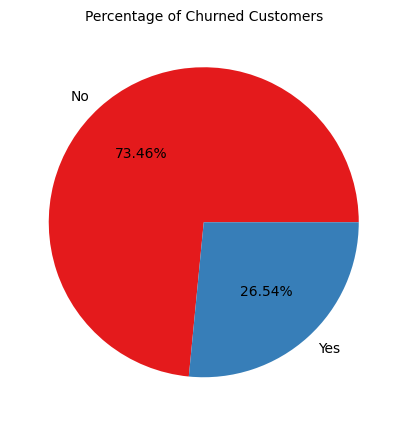

In [40]:
#Target Variable
print("Distribution:",df["Churn"].value_counts())

#Graphic
ax = sns.countplot(x='Churn', data=df, hue = 'Churn', palette = "Set1")
plt.title ("Churn Distribution")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

plt.figure(figsize = (5,6))
gb = df.groupby("Churn").agg({'Churn':"count"})
colors = sns.color_palette("Set1")
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%", colors=colors)
plt.title("Percentage of Churned Customers", fontsize = 10)
plt.show()

A total of 1,869 customers have churned, which represents 26.54% of the dataset. 
Let’s explore the reasons behind customer churn.
We will now analyze the factors column by column to understand why customers leave.

Distribution: gender
Male      3555
Female    3488
Name: count, dtype: int64


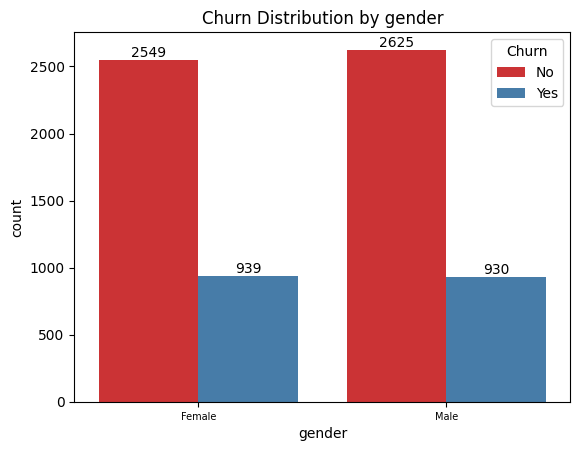

Distribution: SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


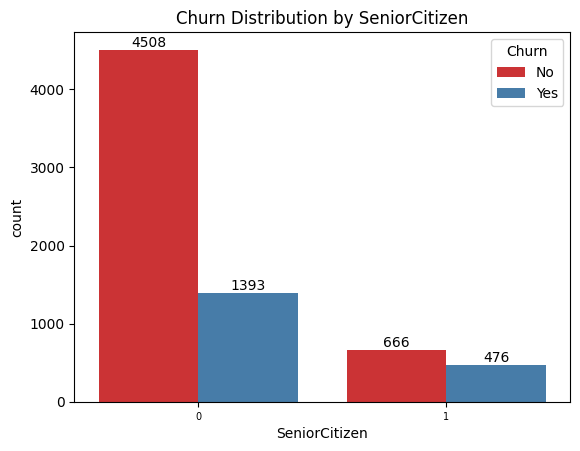

Distribution: Partner
No     3641
Yes    3402
Name: count, dtype: int64


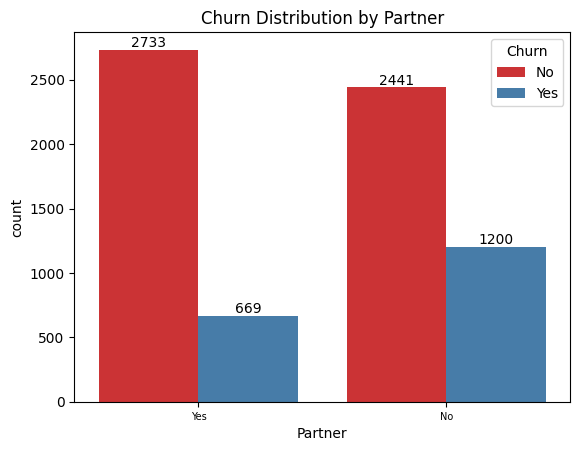

Distribution: Dependents
No     4933
Yes    2110
Name: count, dtype: int64


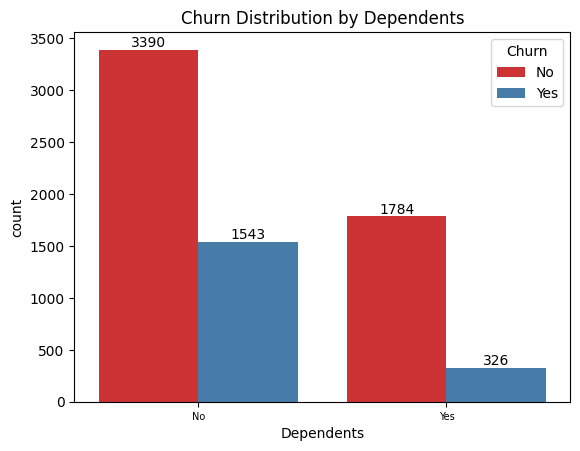

In [72]:
#Graphic Function
def churn_distribution_graphic (variable):
    print("Distribution:", df[variable].value_counts())
    #Graphic
    ax=sns.countplot(x=variable, data=df, hue="Churn", palette="Set1")
    plt.title(f"Churn Distribution by {variable}")
    plt.xticks(fontsize=7)
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

#Gender
churn_distribution_graphic('gender')
churn_distribution_graphic('SeniorCitizen')
churn_distribution_graphic('Partner')
churn_distribution_graphic('Dependents')


In [70]:
df.groupby(["gender", "Partner", "SeniorCitizen", "Dependents"])["Churn"].value_counts()

gender  Partner  SeniorCitizen  Dependents  Churn
Female  No       0              No          No       909
                                            Yes      429
                                Yes         No       110
                                            Yes       32
                 1              No          No       159
                                            Yes      158
                                Yes         No         2
                                            Yes        1
        Yes      0              No          No       482
                                            Yes      114
                                Yes         No       720
                                            Yes      124
                 1              No          No       136
                                            Yes       73
                                Yes         No        31
                                            Yes        8
Male    No       0              No    

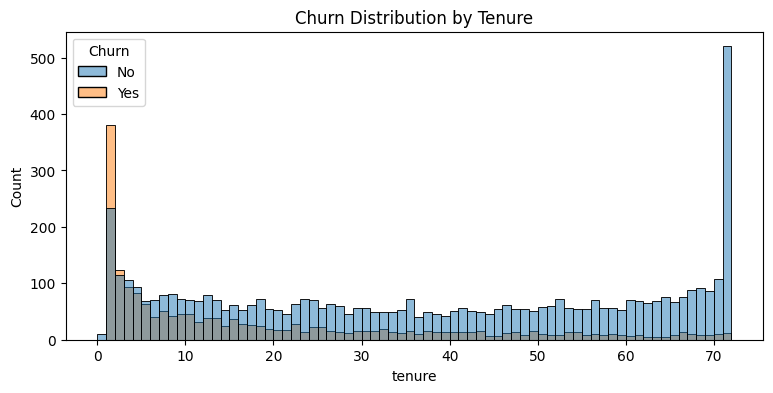

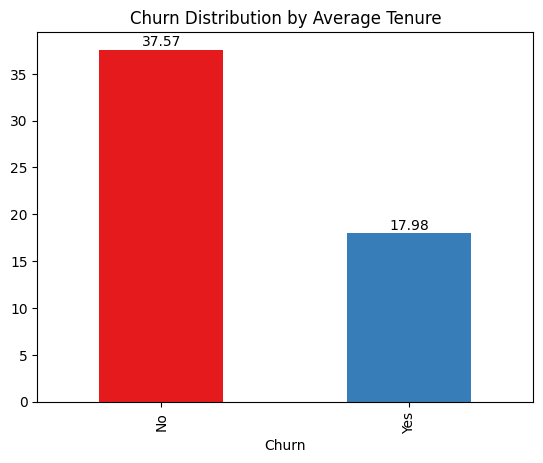

In [61]:
#TENURE
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.title("Churn Distribution by Tenure")
plt.show()


average_tenure = df.groupby(["Churn"])["tenure"].mean()
ax=average_tenure.plot(kind='bar', color=colors)
plt.title("Churn Distribution by Average Tenure")

#Lables
for i,v in enumerate(average_tenure):
    ax.text(i, v+0.1, f"{v:.2f}", ha='center', va='bottom' )
plt.show()

Distribution: Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


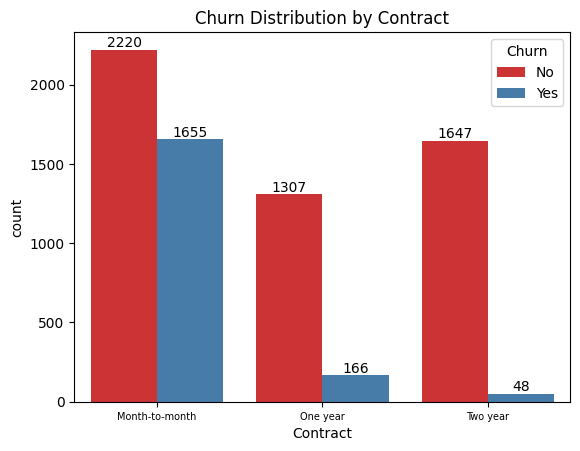

Distribution: PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


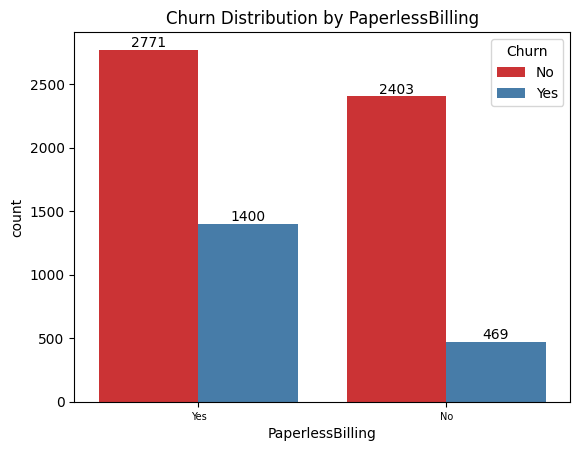

Distribution: PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


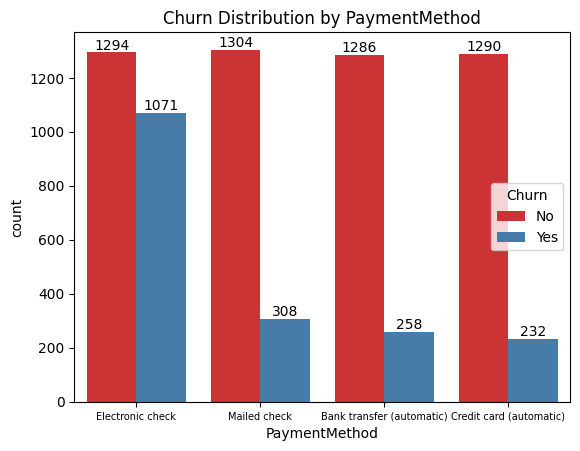

In [73]:
#CONTRACT
churn_distribution_graphic('Contract')
#PAPERLESS BILLING
churn_distribution_graphic('PaperlessBilling')
#PAYMENT METHOD
churn_distribution_graphic('PaymentMethod')

Distribution: PhoneService
Yes    6361
No      682
Name: count, dtype: int64


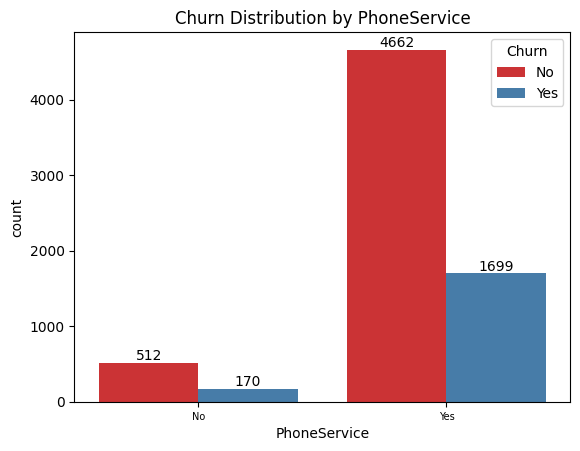

Distribution: MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


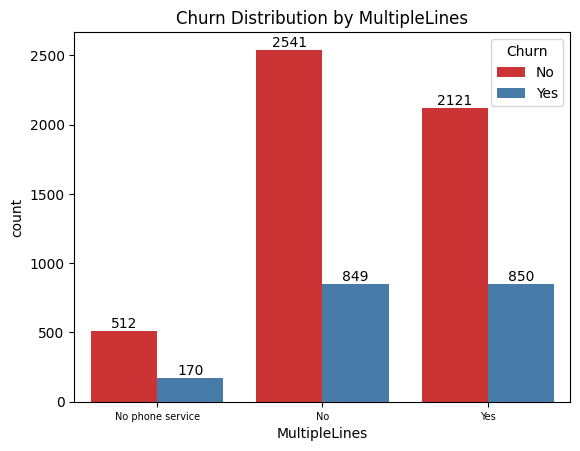

Distribution: InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


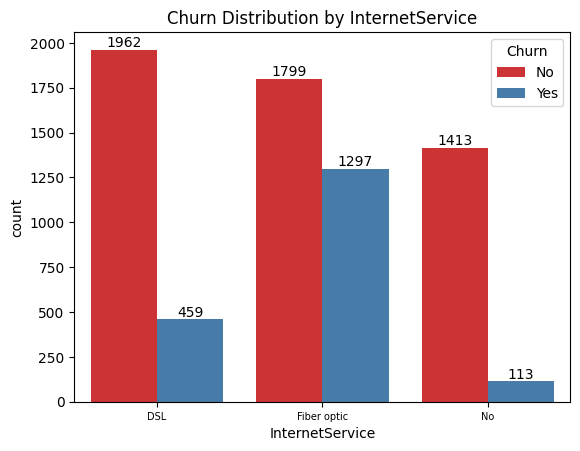

Distribution: OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


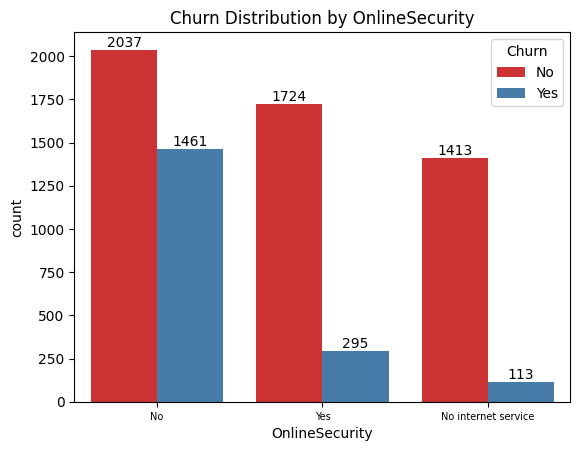

Distribution: OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


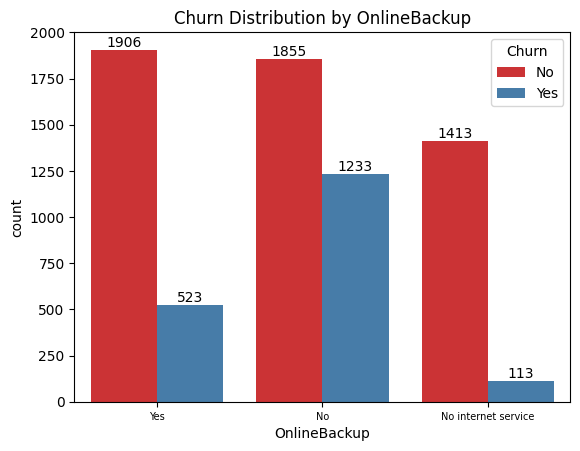

Distribution: DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


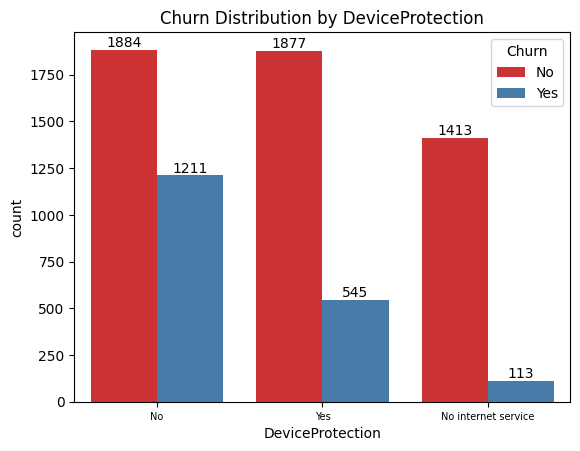

Distribution: TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


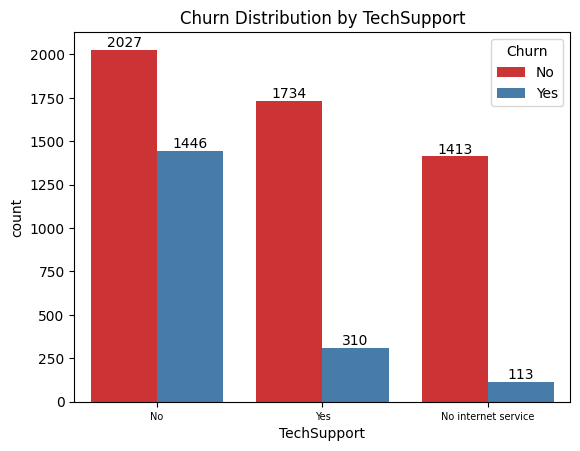

Distribution: StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


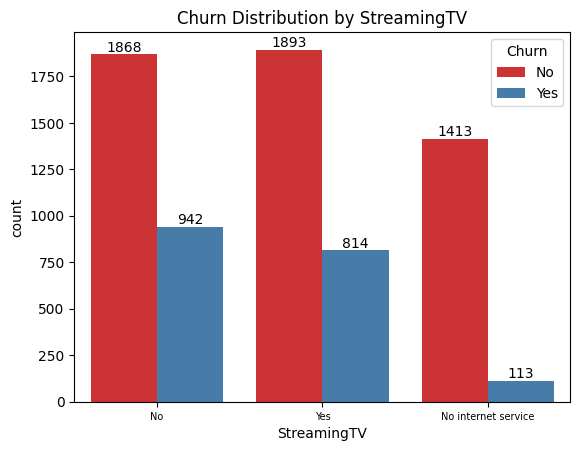

Distribution: StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


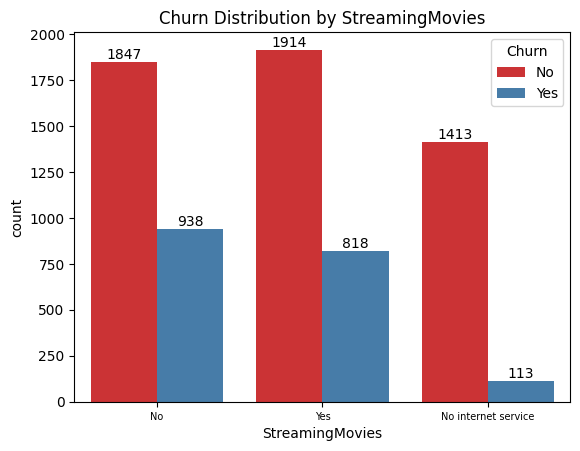

In [74]:
churn_distribution_graphic('PhoneService')
churn_distribution_graphic('MultipleLines')
churn_distribution_graphic('InternetService')
churn_distribution_graphic('OnlineSecurity')
churn_distribution_graphic('OnlineBackup')
churn_distribution_graphic('DeviceProtection')
churn_distribution_graphic('TechSupport')
churn_distribution_graphic('StreamingTV')
churn_distribution_graphic('StreamingMovies')

In [129]:
df[df['tenure']==0]
#If there are customers with tenure = 0, it means that also Total Charges is equal to zero
#We can see thart TotalCharges is a blank space for those customers



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [130]:
#Replace blank space with zero 
df["TotalCharges"] = df["TotalCharges"].replace(" ",0)
df["TotalCharges"] = df["TotalCharges"].astype("float")

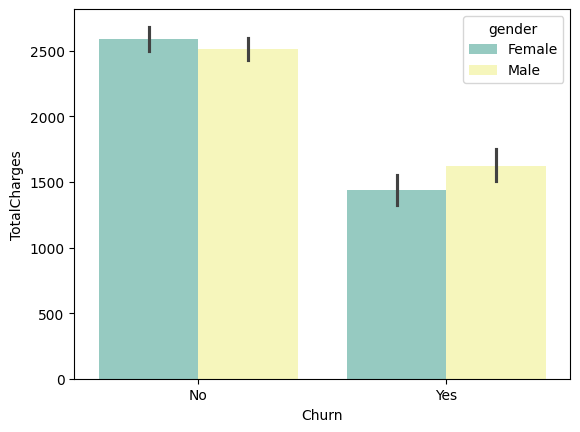

In [131]:
#Graphic
sns.barplot(x="Churn", y="TotalCharges", data=df,hue="gender", palette="Set3")
plt.show()

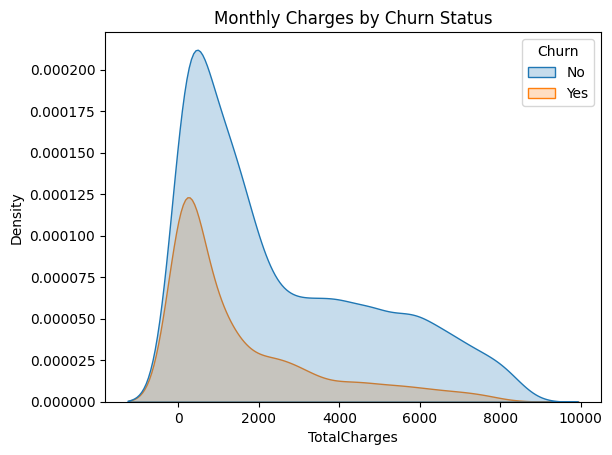

In [132]:
sns.kdeplot(data=df, x='TotalCharges', hue='Churn', fill=True)
plt.title("Monthly Charges by Churn Status")
plt.show()

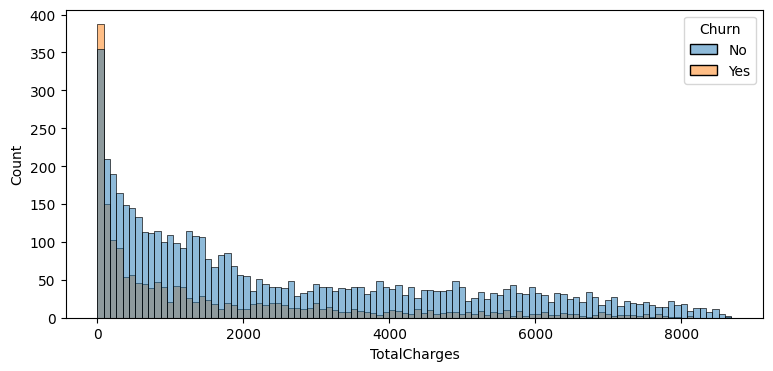

In [133]:
plt.figure(figsize = (9,4))
sns.histplot(x = "TotalCharges", data = df, bins = 100, hue = "Churn")
plt.show()

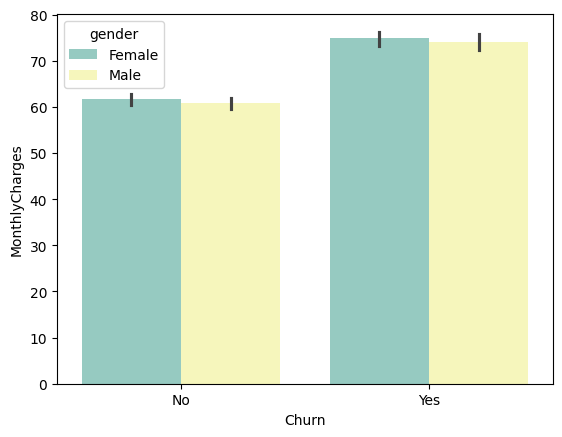

In [134]:
#Monthly Charge
sns.barplot(x='Churn', y='MonthlyCharges', data=df,hue='gender', palette="Set3")
plt.show()

Based on the exploratory analysis of each column (feature), the following factors are most strongly associated with customer churn:
- Tenure: Customers with shorter tenure in the first few months are much more likely to churn. While Long term customers have a significantly lower churn rate
- Contract Type: Customers on month to month contract exhibit a substantially higher churn rate compared to those with one-year contracts
- Internet Service: Customers using Fiber Optic internet tend to churn more than those with DSL or no internet service.
- Additional Services: Customers who do not subscribe to Online Security, Online Backup, Device Protection, or Tech Support are more likely to churn, suggesting that these services support retention.
- Payment Method: Customers paying via Electronic Check show higher churn compared to those using automatic bank transfers or credit cards.
- Total Charges: Customers with lower total accumulated charges are more prone to churn.
- Paperless Billing: Customers using paperless billing have a higher churn rate than those who do not.
- Senior Citizen Status: Senior citizens are more likely to churn than non-senior customers.
- Partner and Dependents: Customers without partners or dependents show higher churn compared to those with partners or dependents.
- Gender: Gender does not appear to significantly influence churn.

### Prediction

#### Data Preprocessing

In [135]:
#Checking missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

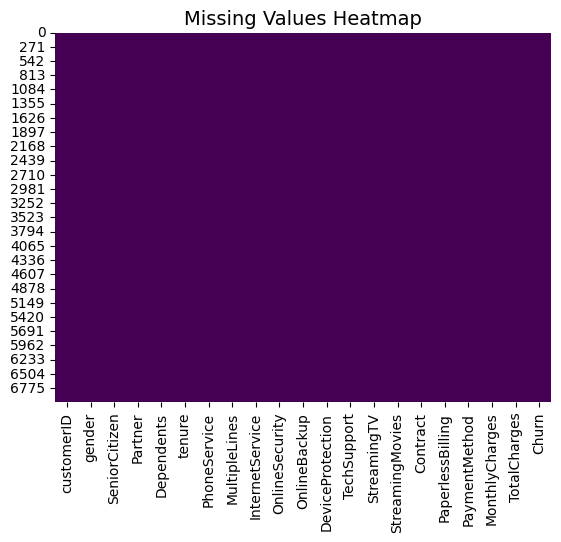

In [136]:
#Missing Values HeatMap
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap", fontsize=14)
plt.show()

#### Feature Encoding 

In [138]:
df_copy=df.copy()

#Categorical Variables
categoricals = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
               'PhoneService', 'MultipleLines', 'InternetService',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
               'PaperlessBilling', 'PaymentMethod','Churn']

encoders={}

for cat in categoricals:
    le=LabelEncoder()
    df_copy[cat]=le.fit_transform(df_copy[cat])
    encoders[cat] = le #we store encoder for reverse transformation

In [137]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [143]:
df_copy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [151]:
#Numeric Variables
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                        'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                        'PaperlessBilling', 'PaymentMethod'] #the same of categoricals, but without Churn (target)
target = ['Churn']
y=df_copy[target]

#Anova f-test Numerical Features
X_num = df_copy[numerical_features]
num_selector = SelectKBest (score_func=f_classif, k='all')
num_selector.fit(X_num, y)

num_scores= pd.DataFrame({
    'Feature': numerical_features,
    'Score': num_selector.scores_
})

num_scores

C:\Users\gauricchio\AppData\Local\miniconda3\envs\resa2\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Feature,Score
0,tenure,997.268010
1,MonthlyCharges,273.463704
2,TotalCharges,288.278961


**Anova f-test** for numerical variables calculate how a numeric feature is useful to distinguish the target (churn). ANOVA compares the average value for a numerical variable in different groups (in this case Churn=0 and Churn=1). If the averages are very different, the feature has prediction power, otherwise doesn't. The test produces a F-score: increasing f-score increase the predictive power of the variable.

In [153]:
#Chi2 test Categorical Features
X_cat=df_copy[categorical_features]
cat_selector = SelectKBest (score_func=chi2, k='all')
cat_selector.fit(X_cat, y)

cat_scores = pd.DataFrame({
    'Feature': categorical_features,
    'Score': cat_selector.scores_
})

cat_scores

,Feature,Score
0,gender,0.258699
1,SeniorCitizen,134.351545
2,Partner,82.412083
3,Dependents,133.036443
4,PhoneService,0.097261
5,MultipleLines,9.746921
6,InternetService,9.821028
7,OnlineSecurity,551.611529
8,OnlineBackup,230.086520
9,DeviceProtection,191.303140


**Chi2-test** for categorical variables measures the association between two categorical variables: in this case each feature and the target variable (churn). The test produces a score, increasing the chi-2 score increases the predictive power of the variable.

In [156]:
#Combine Scores
combined_scores = pd.concat([cat_scores, num_scores],axis=0).sort_values(by='Score', ascending=False).reset_index(drop=True)
combined_scores

,Feature,Score
0,Contract,1115.780167
1,tenure,997.268010
2,OnlineSecurity,551.611529
3,TechSupport,523.303866
4,TotalCharges,288.278961
5,MonthlyCharges,273.463704
6,OnlineBackup,230.086520
7,DeviceProtection,191.303140
8,SeniorCitizen,134.351545
9,Dependents,133.036443


In [173]:
top_features=combined_scores.iloc[0:17,:]['Feature'].to_list()
print("Top 17 features:\n", top_features)
top_numerical = [f for f in top_features if f in numerical_features]
top_categorical = [f for f in top_features if f in categorical_features]

print("\nTop numerical features:\n", top_numerical)
print("\nTop catogorical features:\n", top_categorical)

Top 17 features:
 ['Contract', 'tenure', 'OnlineSecurity', 'TechSupport', 'TotalCharges', 'MonthlyCharges', 'OnlineBackup', 'DeviceProtection', 'SeniorCitizen', 'Dependents', 'PaperlessBilling', 'Partner', 'PaymentMethod', 'InternetService', 'MultipleLines', 'StreamingMovies', 'StreamingTV']

Top numerical features:
 ['tenure', 'TotalCharges', 'MonthlyCharges']

Top catogorical features:
 ['Contract', 'OnlineSecurity', 'TechSupport', 'OnlineBackup', 'DeviceProtection', 'SeniorCitizen', 'Dependents', 'PaperlessBilling', 'Partner', 'PaymentMethod', 'InternetService', 'MultipleLines', 'StreamingMovies', 'StreamingTV']


In [174]:
X_top = df_copy[top_features].copy() #X top features
y_top = df_copy[['Churn']].copy() #target

#Split train test
X_train, X_test, y_train, y_test = train_test_split(
    X_top, y_top, test_size=0.2, random_state=42, stratify=y
)

In [193]:
#numerical features
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
#train
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[top_numerical]), columns = X_train[top_numerical].columns)
#test
X_test_scaled = pd.DataFrame(scaler.transform(X_test[top_numerical]), columns = X_test[top_numerical].columns)

print("X_train Numerical scale:\n",X_train_scaled)
print("\nX_test Numerical scale:\n",X_test_scaled)

X_train Numerical scale:
         tenure  TotalCharges  MonthlyCharges
0     0.102371     -0.262257       -0.521976
1    -0.711743     -0.503635        0.337478
2    -0.793155     -0.749883       -0.809013
3    -0.263980     -0.172722        0.284384
4    -1.281624     -0.989374       -0.676279
...        ...           ...             ...
5629  1.567778      2.373129        1.470695
5630 -1.240918     -0.973665       -0.626504
5631 -0.304686      0.158344        1.256662
5632 -0.345392     -0.797075       -1.477661
5633 -1.078095     -0.960962       -1.469365

[5634 rows x 3 columns]

X_test Numerical scale:
         tenure  TotalCharges  MonthlyCharges
0     1.608483      2.706828        1.629976
1    -0.996684     -0.610260        1.168725
2     0.346606      0.400116        0.445324
3    -0.589626     -0.364451        0.440347
4     1.608483      1.588421        0.588013
...        ...           ...             ...
1404  0.672252      0.897615        0.738999
1405 -0.182569     -0.7

In [204]:
#Categorical Features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

#train
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[top_categorical]), columns = encoder.get_feature_names_out(top_categorical))
#test
X_test_encoded = pd.DataFrame(encoder.transform(X_test[top_categorical]), columns = encoder.get_feature_names_out(top_categorical))

print("X_train Categorial encode:\n",X_train_encoded)
print("\nX_test Categorial encode:\n",X_test_encoded)

X_train Categorial encode:
       Contract_0  Contract_1  Contract_2  OnlineSecurity_0  OnlineSecurity_1  \
0            1.0         0.0         0.0               1.0               0.0   
1            1.0         0.0         0.0               0.0               0.0   
2            0.0         0.0         1.0               0.0               0.0   
3            0.0         0.0         1.0               1.0               0.0   
4            1.0         0.0         0.0               1.0               0.0   
...          ...         ...         ...               ...               ...   
5629         0.0         0.0         1.0               1.0               0.0   
5630         1.0         0.0         0.0               1.0               0.0   
5631         1.0         0.0         0.0               0.0               0.0   
5632         0.0         1.0         0.0               0.0               1.0   
5633         1.0         0.0         0.0               0.0               1.0   

      Onlin

In [207]:
#Merge
X_train_final = pd.concat([X_train_scaled, X_train_encoded],axis=1)
X_test_final = pd.concat([X_test_scaled, X_test_encoded],axis=1)

In [208]:
X_train_final

,tenure,TotalCharges,MonthlyCharges,Contract_0,Contract_1,Contract_2,OnlineSecurity_0,OnlineSecurity_1,OnlineSecurity_2,TechSupport_0,...,InternetService_2,MultipleLines_0,MultipleLines_1,MultipleLines_2,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,StreamingTV_0,StreamingTV_1,StreamingTV_2
0,0.102371,-0.262257,-0.521976,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.711743,-0.503635,0.337478,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-0.793155,-0.749883,-0.809013,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-0.263980,-0.172722,0.284384,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-1.281624,-0.989374,-0.676279,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1.567778,2.373129,1.470695,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5630,-1.240918,-0.973665,-0.626504,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5631,-0.304686,0.158344,1.256662,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5632,-0.345392,-0.797075,-1.477661,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [209]:
X_test_final

,tenure,TotalCharges,MonthlyCharges,Contract_0,Contract_1,Contract_2,OnlineSecurity_0,OnlineSecurity_1,OnlineSecurity_2,TechSupport_0,...,InternetService_2,MultipleLines_0,MultipleLines_1,MultipleLines_2,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,StreamingTV_0,StreamingTV_1,StreamingTV_2
0,1.608483,2.706828,1.629976,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.996684,-0.610260,1.168725,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.346606,0.400116,0.445324,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.589626,-0.364451,0.440347,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.608483,1.588421,0.588013,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0.672252,0.897615,0.738999,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1405,-0.182569,-0.794815,-1.480980,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1406,-1.118801,-0.967873,-1.469365,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1407,0.957192,-0.547360,-1.500890,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#### Training

In [212]:
models = {
    "RandomForest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                             random_state=42, n_jobs=-1),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

param_grids = {
    "RandomForest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    
    "XGBoost": {
        "n_estimators": [100, 200, 300],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.8, 1.0],
        "colsample_bytree": [0.8, 1.0]
    },
    
    "GradientBoosting": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
        "subsample": [0.8, 1.0]
    },
    
    "AdaBoost": {
        "n_estimators": [50, 100, 200, 300],
        "learning_rate": [0.01, 0.1, 1.0]
    }
}

In [213]:
results = []

#For Cycle on models
for name, model in models.items():
    print(f"\n Tuning {name} ...")

    #RandomizedSearchCV with the model selected
    search = RandomizedSearchCV(
        model,
        param_distributions=param_grids[name],
        n_iter=10,        
        cv=3,
        scoring='f1_weighted',
        n_jobs=-1,
        random_state=42,
        verbose=1
    )
    
    #fit
    search.fit(X_train_final, y_train)
    
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test_final)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append({
        'model': name,
        'accuracy': acc,
        'f1_weighted': f1,
        'best_model': best_model,
        'best_params': search.best_params_
    })
    
    print(f"\n{name} Best Params: {search.best_params_}")
    print(f"Accuracy: {acc:.4f}, Weighted F1: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


 Tuning RandomForest ...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\gauricchio\AppData\Local\miniconda3\envs\resa2\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



RandomForest Best Params: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}
Accuracy: 0.8062, Weighted F1: 0.7984

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.53      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409


 Tuning XGBoost ...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\gauricchio\AppData\Local\miniconda3\envs\resa2\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:09:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Best Params: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Accuracy: 0.8055, Weighted F1: 0.7965

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.52      0.58       374

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409


 Tuning GradientBoosting ...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\gauricchio\AppData\Local\miniconda3\envs\resa2\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



GradientBoosting Best Params: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
Accuracy: 0.8084, Weighted F1: 0.8007

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.68      0.53      0.60       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409


 Tuning AdaBoost ...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\gauricchio\AppData\Local\miniconda3\envs\resa2\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



AdaBoost Best Params: {'n_estimators': 100, 'learning_rate': 1.0}
Accuracy: 0.8006, Weighted F1: 0.7943

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.65      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



#### Results

In [215]:
results_df = pd.DataFrame(results).sort_values(by='f1_weighted', ascending=False).reset_index(drop=True)
print("\nSummary (sorted by weighted F1):")
print(results_df[['model', 'accuracy', 'f1_weighted']])


Summary (sorted by weighted F1):
              model  accuracy  f1_weighted
0  GradientBoosting  0.808375     0.800700
1      RandomForest  0.806246     0.798367
2           XGBoost  0.805536     0.796537
3          AdaBoost  0.800568     0.794342


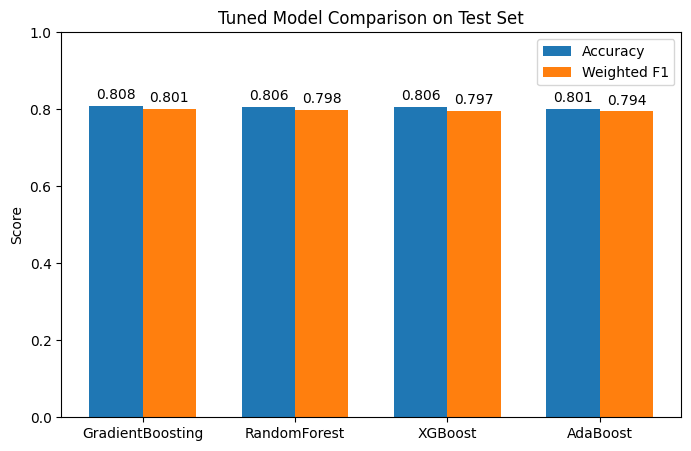

In [217]:
plt.figure(figsize=(8,5))
width = 0.35
x = np.arange(len(results_df))

# Barre
bars1 = plt.bar(x - width/2, results_df['accuracy'], width, label='Accuracy')
bars2 = plt.bar(x + width/2, results_df['f1_weighted'], width, label='Weighted F1')

# Etichette asse x e limiti
plt.xticks(x, results_df['model'])
plt.ylim(0,1)
plt.ylabel('Score')
plt.title('Tuned Model Comparison on Test Set')
plt.legend()

# Aggiungi etichette sopra le barre
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.3f}", ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.3f}", ha='center', va='bottom')

plt.show()